1. Import Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les donn√©es
df = pd.read_csv("Building_Energy_Benchmarking_Data__2015-Present_20250302.csv")

# 
df.shape

# Afficher les premi√®res et derni√®res lignes
df.head()
df.tail()

# V√©rifier la taille du dataset
print(f"Shape du dataset: {df.shape}")

# V√©rifier les noms des colonnes
print(f"Noms des colonnes: {df.columns}")

# Obtenir un aper√ßu g√©n√©ral des types de donn√©es et des valeurs manquantes
df.info()

# V√©rifier le type des colonnes
df.dtypes

# 
n = 10  # Nombre d'√©chantillons souhait√©s
df.sample(n)


# V√©rifier la pr√©sence de valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Shape du dataset: (30616, 46)
Noms des colonnes: Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuildings', 'PropertyGFAParking', 'SelfReportGFATotal',
       'SelfReportGFABuildings', 'SelfReportParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electric

NumberofFloors                        83
NumberofBuildings                    294
ENERGYSTARScore                     7917
SiteEUIWN(kBtu/sf)                  1166
SiteEUI(kBtu/sf)                     856
SiteEnergyUse(kBtu)                  851
SiteEnergyUseWN(kBtu)               1161
SourceEUIWN(kBtu/sf)                1166
SourceEUI(kBtu/sf)                   856
LargestPropertyUseType                 8
LargestPropertyUseTypeGFA              3
SecondLargestPropertyUseType       13102
SecondLargestPropertyUseTypeGFA    13102
ThirdLargestPropertyUseType        23927
ThirdLargestPropertyUseTypeGFA     24088
Electricity(kWh)                     541
SteamUse(kBtu)                     29559
NaturalGas(therms)                 11448
ComplianceIssue                      345
Electricity(kBtu)                    541
NaturalGas(kBtu)                   11448
TotalGHGEmissions                    457
GHGEmissionsIntensity                459
dtype: int64

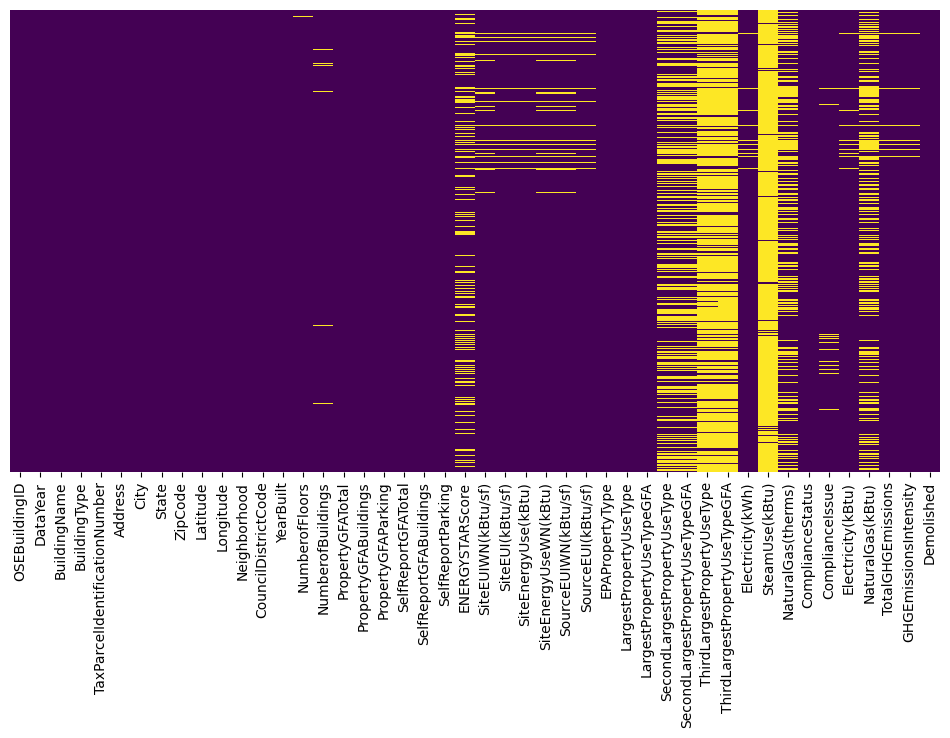

In [10]:
#Visualiser les valeurs manquantes avec un heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()



üìä Pourcentage de valeurs manquantes par colonne avant traitement :
SteamUse(kBtu)                     96.547557
ThirdLargestPropertyUseTypeGFA     78.677816
ThirdLargestPropertyUseType        78.151947
SecondLargestPropertyUseType       42.794617
SecondLargestPropertyUseTypeGFA    42.794617
NaturalGas(kBtu)                   37.392213
NaturalGas(therms)                 37.392213
ENERGYSTARScore                    25.859028
SiteEUIWN(kBtu/sf)                  3.808466
SourceEUIWN(kBtu/sf)                3.808466
SiteEnergyUseWN(kBtu)               3.792135
SiteEUI(kBtu/sf)                    2.795924
SourceEUI(kBtu/sf)                  2.795924
SiteEnergyUse(kBtu)                 2.779592
Electricity(kBtu)                   1.767050
Electricity(kWh)                    1.767050
GHGEmissionsIntensity               1.499216
TotalGHGEmissions                   1.492684
ComplianceIssue                     1.126862
NumberofBuildings                   0.960282
NumberofFloors               

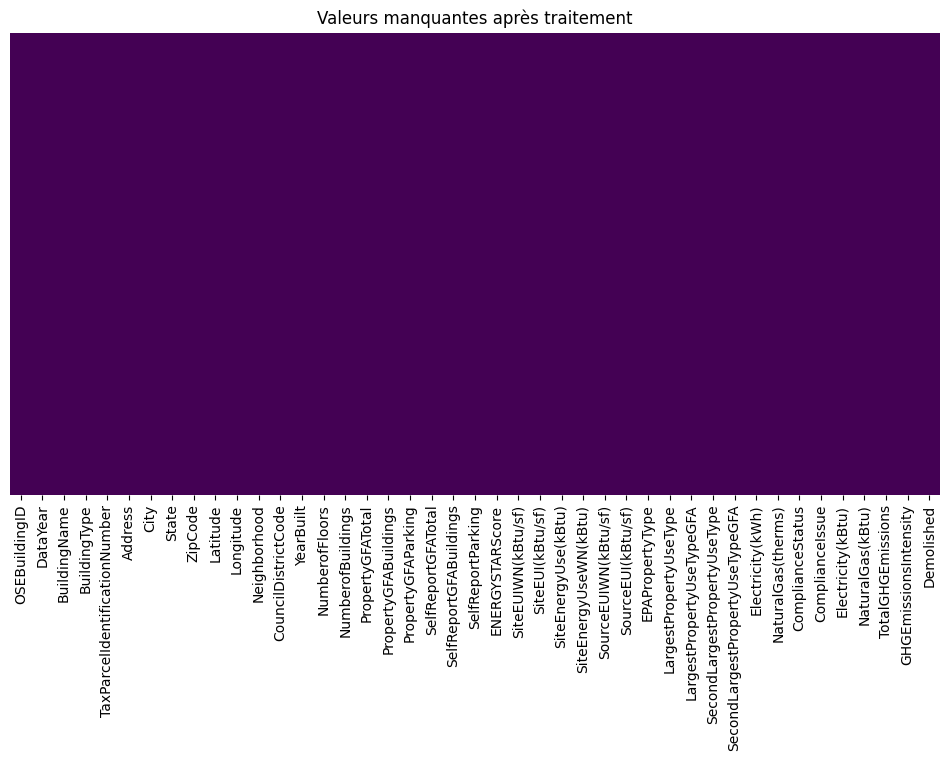

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ V√©rification des valeurs manquantes avant traitement
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nüìä Pourcentage de valeurs manquantes par colonne avant traitement :")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# 2Ô∏è‚É£ Suppression des colonnes avec plus de 70% de valeurs manquantes
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\nüóëÔ∏è Colonnes supprim√©es ({len(cols_to_drop)}): {list(cols_to_drop)}")
print(f"üîÑ Nouvelle shape du dataset apr√®s suppression : {df.shape}")

# 3Ô∏è‚É£ Imputation des valeurs num√©riques manquantes (m√©diane)
num_cols = df.select_dtypes(include=['number']).columns  # S√©lection automatique des colonnes num√©riques
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

print("\n‚úÖ Imputation des valeurs num√©riques avec la m√©diane termin√©e.")

# 4Ô∏è‚É£ Imputation des valeurs cat√©goriques manquantes (remplacement par 'Unknown')
cat_cols = df.select_dtypes(include=['object']).columns  # S√©lection automatique des colonnes cat√©goriques
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n‚úÖ Imputation des valeurs cat√©goriques termin√©e.")

# 5Ô∏è‚É£ V√©rification finale des valeurs manquantes
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print("\nüîç V√©rification finale des valeurs manquantes apr√®s traitement :")
if remaining_missing.empty:
    print("‚úÖ Aucune valeur manquante restante.")
else:
    print(remaining_missing)

# üìä Visualisation des valeurs manquantes apr√®s traitement
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valeurs manquantes apr√®s traitement")
plt.show()
